# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Library Imports and Functions

In [5]:
import pandas as pd # data analysis and manipulation
import numpy as np # back up to pandas, I like to import it
import matplotlib.pyplot as plt # data visuals
import seaborn as sns # data visuals

In [6]:
# EDA functions

def df_shape(dataframe):
    shape = dataframe.shape
    if shape != (0, 0):
        return dataframe.shape
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def df_info(dataframe):
    info = dataframe.info()
    if not dataframe.empty:
        return info
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def df_head(dataframe):
    if not dataframe.empty:
        return dataframe.head()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."


def df_nulls(dataframe):
    null_count = dataframe.isnull().sum()
    null_percent = (null_count * 100) / len(dataframe)
    if not dataframe.empty:
        print(f"Here are the number of nulls per column: \n{null_count}")
        print(f"Here are the percent of nulls per column: \n{null_percent}")
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_dups(dataframe):
    dup_count = dataframe.duplicated().sum()
    if not dataframe.empty:
        return f"There are {dup_count} duplicates in your dataframe."
    else:
        return "Your dataframe does not exist. Check your dataframe variable."
    
def drop_dups(dataframe):
    if not dataframe.empty:
        return dataframe.drop_duplicates()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_num_describe(dataframe):
    if not dataframe.empty:
        return dataframe.describe()
    else:
        return "Your dataframe does not exist. Check your dataframe variable."

def df_cat_describe(dataframe):
    if not dataframe.empty():
        return dataframe.describe(include='O')
    else:
        return "Your dataframe does not exist. Check your dataframe variable."


# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [7]:
#load data

raw_data = pd.read_csv('Wholesale_Data.csv')

#make copy
copy_data = raw_data.copy()

In [5]:
#get df shape
df_shape(copy_data)

# df of size (440, 8)

(440, 8)

In [6]:
#get info
df_info(copy_data)

# no nulls by the looks of it, will double check, all data types are int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
#get sample
df_head(copy_data)

# I'm assuming these are counts of item type per channel and region?

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [13]:
# check number of nulls and frequency
df_nulls(copy_data)

# no nulls at all

Here are the number of nulls per column: 
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
Here are the percent of nulls per column: 
Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64


In [14]:
#check for duplicates
df_dups(copy_data)

#no duplicates either

'There are 0 duplicates in your dataframe.'

In [15]:
df_num_describe(copy_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
#check unique values per column
copy_data.nunique()

# There are only two channels and 3 regions it appears.

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [2]:
#determine data spread ID outliers

def make_hist(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].hist(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"


def make_boxplot(dataframe, columns, num_rows, num_columns, fig_size):
    if not dataframe.empty:
       fig, axs = plt.subplots(num_rows, num_columns, figsize=fig_size)
       for i in range(num_rows):
           for j in range(num_columns):
               axs[i,j].boxplot(dataframe[columns[i * num_columns + j]])
               axs[i,j].set_title(columns[i * num_columns + j])
    else:
        return "Your dataframe is empty. Check your dataframe variable"


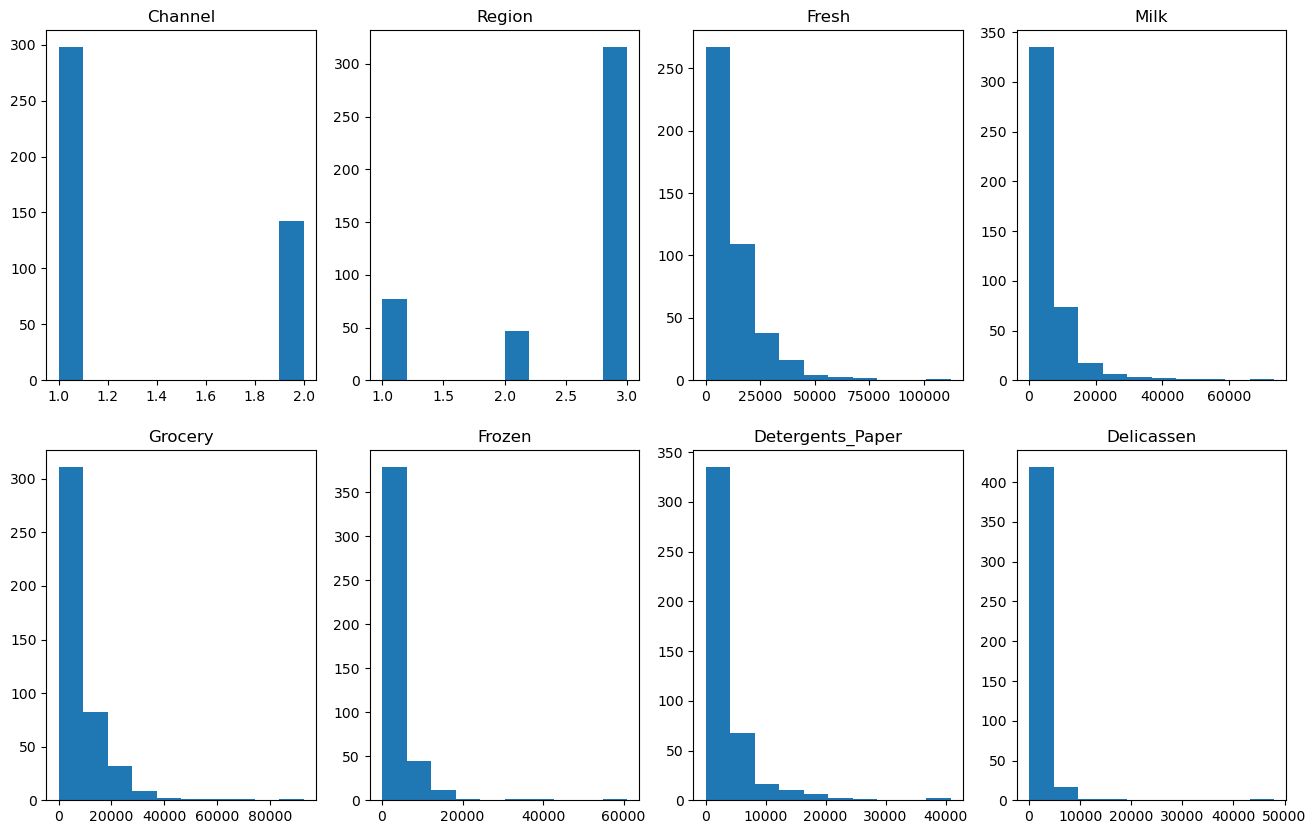

In [9]:
make_hist(copy_data, copy_data.columns, 2, 4, (16, 10))

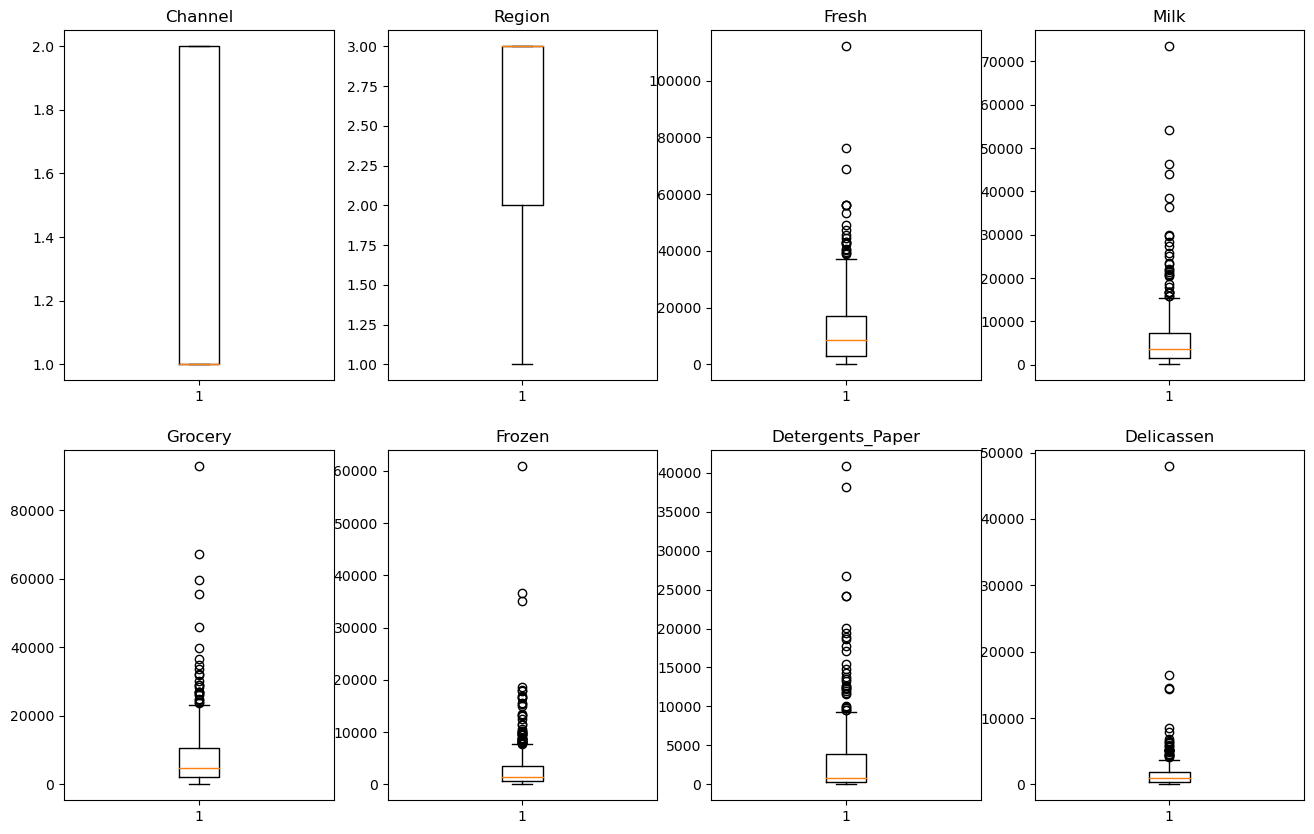

In [10]:
make_boxplot(copy_data, copy_data.columns, 2, 4, (16, 10))

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.